In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df = pd.read_csv("./datosLimpios2022.csv")

In [3]:
df

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,cont_res,cont_nac,cont_prod,pais_prod,pais_res,pro_jefm,jef_migr,edad,precio_pasaje
0,Salida,Ecuatorianos,2022,4,20,Mujer,ECUADOR,Vía Aérea,Residencia,América,América,América,ARGENTINA,ARGENTINA,PICHINCHA,1,23,800.90
1,Entrada,Ecuatorianos,2022,5,26,Mujer,ECUADOR,Vía Aérea,Residencia,América,América,Europa,SUIZA SWITZERLAND,ECUADOR,PICHINCHA,1,68,1200.98
2,Salida,Ecuatorianos,2022,12,8,Hombre,ECUADOR,Vía Terrestre,Residencia,América,América,América,COLOMBIA,ECUADOR,CARCHI,11,14,800.90
3,Salida,Ecuatorianos,2022,10,3,Hombre,ECUADOR,Vía Aérea,Turismo,América,América,América,ESTADOS UNIDOS USA,ECUADOR,GUAYAS,12,71,800.90
4,Entrada,Ecuatorianos,2022,2,1,Mujer,ECUADOR,Vía Aérea,Residencia,Europa,América,Europa,ESPAÑA,ESPAÑA,PICHINCHA,1,38,1000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9930,Entrada,Ecuatorianos,2022,8,14,Mujer,ECUADOR,Vía Terrestre,Residencia,América,América,América,PERU PERU,ECUADOR,EL ORO,9,15,800.90
9931,Salida,Ecuatorianos,2022,11,4,Mujer,ECUADOR,Vía Terrestre,Turismo,América,América,América,COLOMBIA,ECUADOR,CARCHI,11,60,800.90
9932,Salida,Ecuatorianos,2022,5,6,Mujer,ECUADOR,Vía Aérea,Turismo,América,América,América,MEXICO MEXICO,ECUADOR,PICHINCHA,1,30,800.90
9933,Salida,Ecuatorianos,2022,12,20,Hombre,ECUADOR,Vía Aérea,Turismo,América,América,América,ESTADOS UNIDOS USA,ECUADOR,PICHINCHA,1,71,800.90


In [4]:
x= df.loc[:,["precio_pasaje","edad"]]

In [5]:
inercias= []

for k in range(1,20):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans.fit(x)
    inercias.append(kmeans.inertia_)

In [6]:
df2 = pd.DataFrame({"k":np.arange(1,20),"inercias":inercias})

<Axes: xlabel='k', ylabel='inercias'>

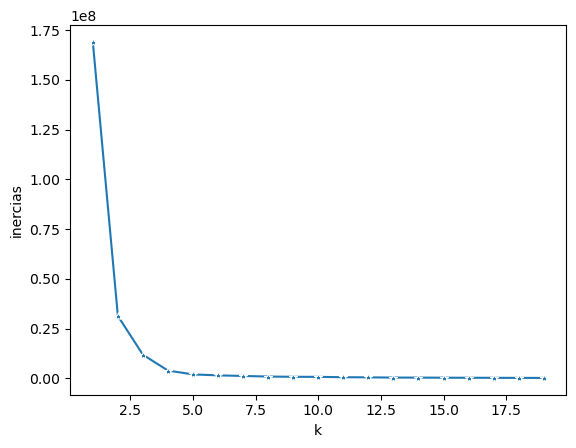

In [7]:
sns.lineplot(data=df2, x="k",y="inercias", marker="*")

In [8]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto")
kmeans.fit(x)

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [9]:
df["cluster"]= kmeans.labels_
df

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,cont_res,cont_nac,cont_prod,pais_prod,pais_res,pro_jefm,jef_migr,edad,precio_pasaje,cluster
0,Salida,Ecuatorianos,2022,4,20,Mujer,ECUADOR,Vía Aérea,Residencia,América,América,América,ARGENTINA,ARGENTINA,PICHINCHA,1,23,800.90,0
1,Entrada,Ecuatorianos,2022,5,26,Mujer,ECUADOR,Vía Aérea,Residencia,América,América,Europa,SUIZA SWITZERLAND,ECUADOR,PICHINCHA,1,68,1200.98,1
2,Salida,Ecuatorianos,2022,12,8,Hombre,ECUADOR,Vía Terrestre,Residencia,América,América,América,COLOMBIA,ECUADOR,CARCHI,11,14,800.90,0
3,Salida,Ecuatorianos,2022,10,3,Hombre,ECUADOR,Vía Aérea,Turismo,América,América,América,ESTADOS UNIDOS USA,ECUADOR,GUAYAS,12,71,800.90,0
4,Entrada,Ecuatorianos,2022,2,1,Mujer,ECUADOR,Vía Aérea,Residencia,Europa,América,Europa,ESPAÑA,ESPAÑA,PICHINCHA,1,38,1000.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9930,Entrada,Ecuatorianos,2022,8,14,Mujer,ECUADOR,Vía Terrestre,Residencia,América,América,América,PERU PERU,ECUADOR,EL ORO,9,15,800.90,0
9931,Salida,Ecuatorianos,2022,11,4,Mujer,ECUADOR,Vía Terrestre,Turismo,América,América,América,COLOMBIA,ECUADOR,CARCHI,11,60,800.90,0
9932,Salida,Ecuatorianos,2022,5,6,Mujer,ECUADOR,Vía Aérea,Turismo,América,América,América,MEXICO MEXICO,ECUADOR,PICHINCHA,1,30,800.90,0
9933,Salida,Ecuatorianos,2022,12,20,Hombre,ECUADOR,Vía Aérea,Turismo,América,América,América,ESTADOS UNIDOS USA,ECUADOR,PICHINCHA,1,71,800.90,0


In [16]:
dfentrada = df.loc[df["tip_movi"]== "Entrada", :]
dfsalida = df.loc[df["tip_movi"]== "Salida", :]

In [17]:
dfg=dfentrada.loc[:,["precio_pasaje","edad", "cluster"]]

C:\Users\damia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


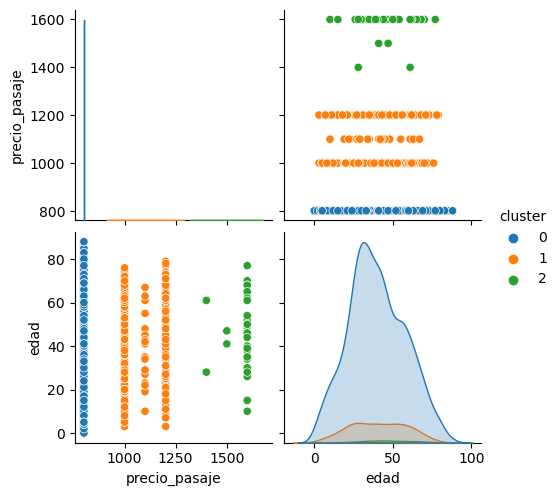

In [18]:
#Hay alguna relacion entre los que gastan los pasajeros y y su edades
#Se puede observar 3 grupos donde la edad no es muy marcada pero si hay grandes diferencia en el precio, en los pasajeros
#que hay menos precio y un mediano precio hay de todas la edades mientras que en los de psajes mas caros si se ve una 
#concentracion de edades mayore a 20
sns.pairplot(dfg,hue="cluster", palette="tab10")

C:\Users\damia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


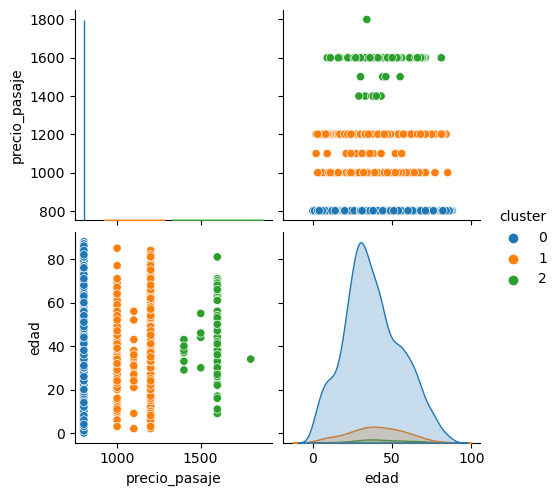

In [20]:
dfg2=dfsalida.loc[:,["precio_pasaje","edad", "cluster"]]
sns.pairplot(dfg2,hue="cluster", palette="tab10")

In [15]:
df.loc[df["cluster"]==0,:]

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,cont_res,cont_nac,cont_prod,pais_prod,pais_res,pro_jefm,jef_migr,edad,precio_pasaje,cluster
0,Salida,Ecuatorianos,2022,4,20,Mujer,ECUADOR,Vía Aérea,Residencia,América,América,América,ARGENTINA,ARGENTINA,PICHINCHA,1,23,800.9,0
2,Salida,Ecuatorianos,2022,12,8,Hombre,ECUADOR,Vía Terrestre,Residencia,América,América,América,COLOMBIA,ECUADOR,CARCHI,11,14,800.9,0
3,Salida,Ecuatorianos,2022,10,3,Hombre,ECUADOR,Vía Aérea,Turismo,América,América,América,ESTADOS UNIDOS USA,ECUADOR,GUAYAS,12,71,800.9,0
5,Entrada,Ecuatorianos,2022,5,8,Hombre,ECUADOR,Vía Aérea,Residencia,América,América,América,COLOMBIA,ECUADOR,PICHINCHA,1,62,800.9,0
6,Salida,Ecuatorianos,2022,10,24,Mujer,ECUADOR,Vía Terrestre,Turismo,América,América,América,COLOMBIA,ECUADOR,CARCHI,11,28,800.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9930,Entrada,Ecuatorianos,2022,8,14,Mujer,ECUADOR,Vía Terrestre,Residencia,América,América,América,PERU PERU,ECUADOR,EL ORO,9,15,800.9,0
9931,Salida,Ecuatorianos,2022,11,4,Mujer,ECUADOR,Vía Terrestre,Turismo,América,América,América,COLOMBIA,ECUADOR,CARCHI,11,60,800.9,0
9932,Salida,Ecuatorianos,2022,5,6,Mujer,ECUADOR,Vía Aérea,Turismo,América,América,América,MEXICO MEXICO,ECUADOR,PICHINCHA,1,30,800.9,0
9933,Salida,Ecuatorianos,2022,12,20,Hombre,ECUADOR,Vía Aérea,Turismo,América,América,América,ESTADOS UNIDOS USA,ECUADOR,PICHINCHA,1,71,800.9,0
